# Analiza wezwań 911

### Projekt EDA

## Wstępna analiza

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('911.csv')

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


In [7]:
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

## Wstępne wnioski
99492 rekordów 9 kolumn. Niektóre kolumny mają brakujące dane. Notebook ćwiczeniowy i bez ML.

## Analiza szczegółowa

5 największych wartości zipcode

In [8]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

5 miast z największą ilości wezwań

In [10]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Sprawdzimy ile jest różnych wartości kolumny title (nazwy wezwań czyli co się stało)

In [15]:
df['title'].nunique()

110

Stworzymy nową kolumnę gdzie będzie wskazana kategoria wezwania czyli z jakiego powodu powstało zdarzenie

In [17]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

Najczęstsze przyczyny wezwań

In [26]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

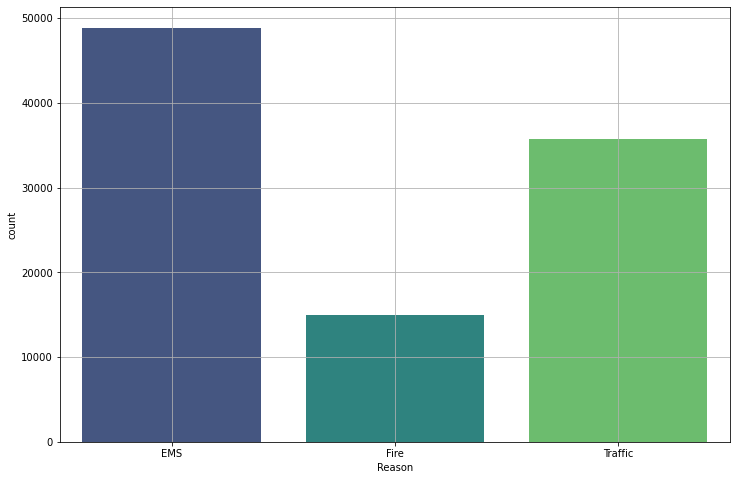

In [31]:
plt.figure(figsize=(12,8))

sns.countplot(x = df.Reason, palette='viridis');
plt.grid(visible = True)

Zajmiemy się kolumną timeStamps. Ustawimy odpowiedni typ i podzielimy

In [34]:
type(df['timeStamp'][0])

str

In [35]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [37]:
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Day'] = df['timeStamp'].apply(lambda time: time.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,3


Dni są podane jako cyfry. Zmienimy na skróty nazw.

In [44]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day'] = df['Day'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,Thu


Stworzymy wykresy dni i miesięcy w odniesieniu do rodzaju zdarzeń.

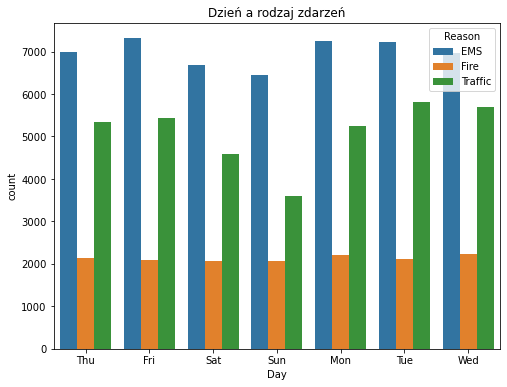

In [52]:
plt.figure(figsize=(8,6))

sns.countplot(x = df['Day'], hue =df['Reason'] )
plt.title('Dzień a rodzaj zdarzeń');

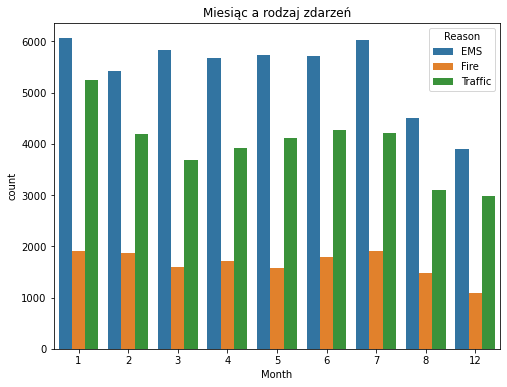

In [55]:
plt.figure(figsize=(8,6))

sns.countplot(x = df['Month'], hue =df['Reason'])
plt.title('Miesiąc a rodzaj zdarzeń');

Paru miesięcy brakuje, spróbujemy zrobić inny wykres, który pokazuje tendencję zdarzeń.

In [59]:
byMonth = df.groupby('Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


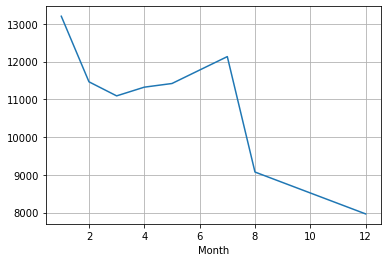

In [66]:
byMonth['twp'].plot()
plt.grid(visible=True)

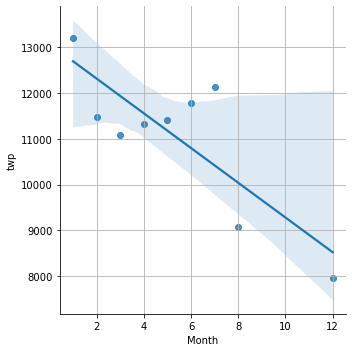

In [72]:
sns.lmplot(x='Month', y ='twp', data = byMonth.reset_index())
plt.grid(visible=True)

Widać tendecję spadkową wraz z upływającymi miesiącami. Stworzymy kolumnę Date i odniesiemy się wykresami do typów zdarzeń.

In [74]:
df['Date'] = df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Month,Hour,Day,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,12,17,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,12,17,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,12,17,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,12,17,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,12,17,Thu,2015-12-10


In [75]:
df = df.drop('timeStamp', axis = 1)

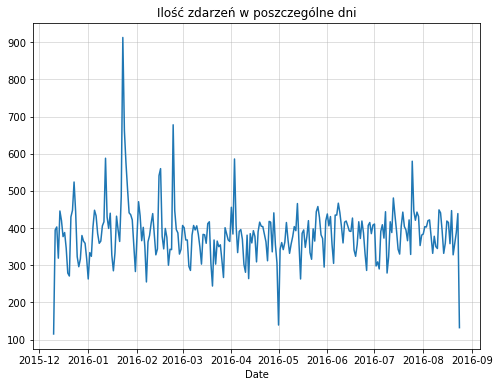

In [84]:
plt.figure(figsize=(8,6))

df.groupby('Date').count()['twp'].plot()
plt.grid(visible=True, alpha = 0.5)
plt.title('Ilość zdarzeń w poszczególne dni');

Tak wygląda ilość zdarzeń dla poszczególnych dni. Podzielimy jeszcze na poszczególne zdarzenia.

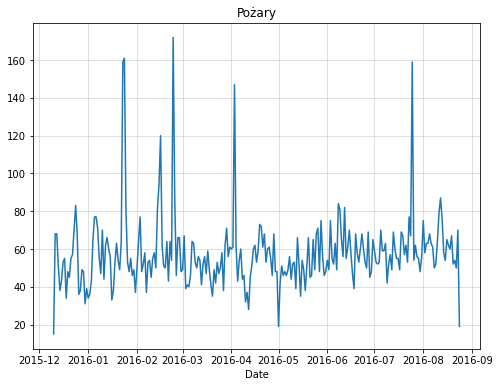

In [88]:
plt.figure(figsize=(8,6))

df[df['Reason'] == 'Fire'].groupby('Date').count()['twp'].plot()
plt.grid(visible=True, alpha = 0.5)
plt.title('Pożary');

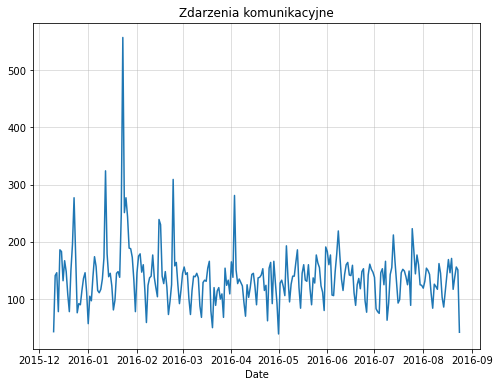

In [90]:
plt.figure(figsize=(8,6))

df[df['Reason'] == 'Traffic'].groupby('Date').count()['twp'].plot()
plt.grid(visible=True, alpha = 0.5)
plt.title('Zdarzenia komunikacyjne');

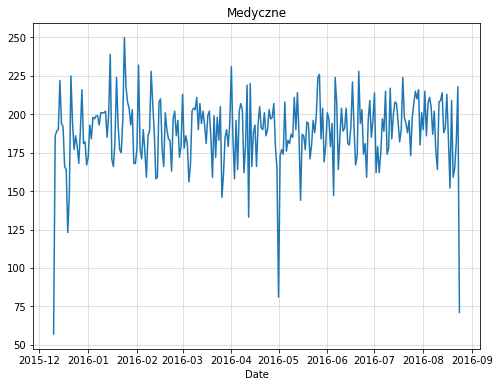

In [91]:
plt.figure(figsize=(8,6))

df[df['Reason'] == 'EMS'].groupby('Date').count()['twp'].plot()
plt.grid(visible=True, alpha = 0.5)
plt.title('Medyczne');

Stworzymy heatmapy. Zrobimy małą rekonfiguracje danych.

In [96]:
dayHour = df.groupby(by =['Day', 'Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


<AxesSubplot:xlabel='Hour', ylabel='Day'>

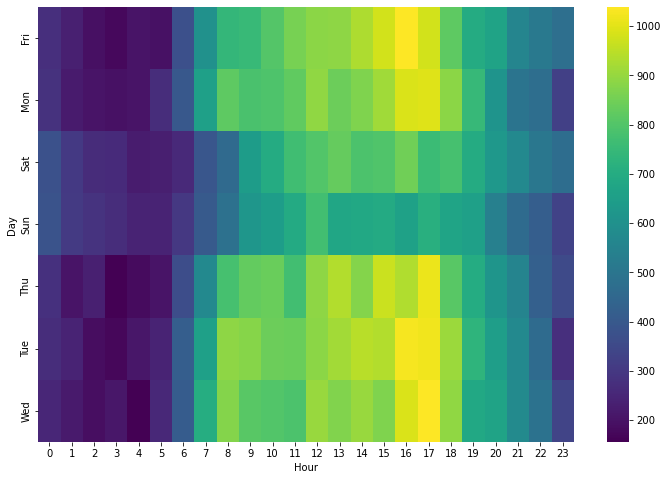

In [100]:
plt.figure(figsize=(12,8))

sns.heatmap(dayHour, cmap='viridis')

<Figure size 864x576 with 0 Axes>

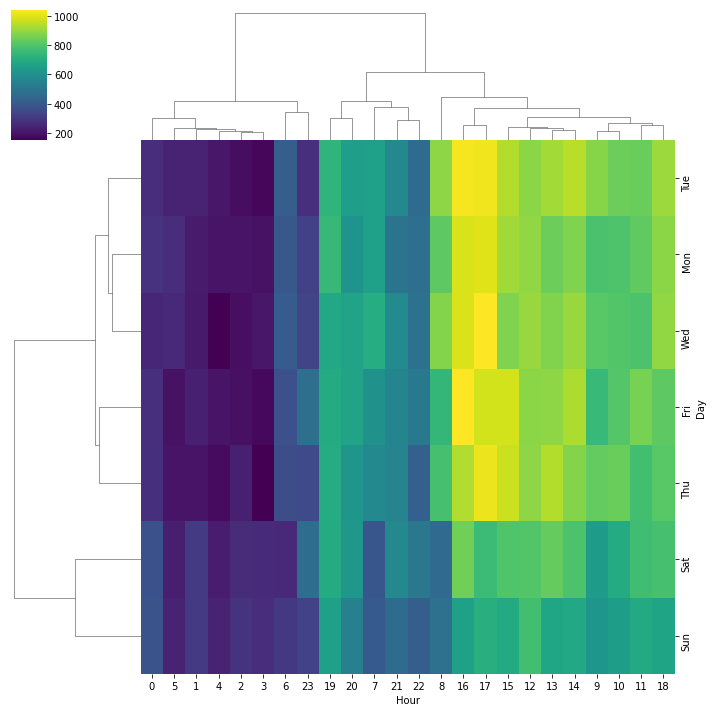

In [101]:
plt.figure(figsize=(12,8))

sns.clustermap(dayHour, cmap='viridis')

In [105]:
plt.figure(figsize=(12,8))

dayMonth = df.groupby(['Day', 'Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
Day,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Figure size 864x576 with 0 Axes>

<AxesSubplot:xlabel='Month', ylabel='Day'>

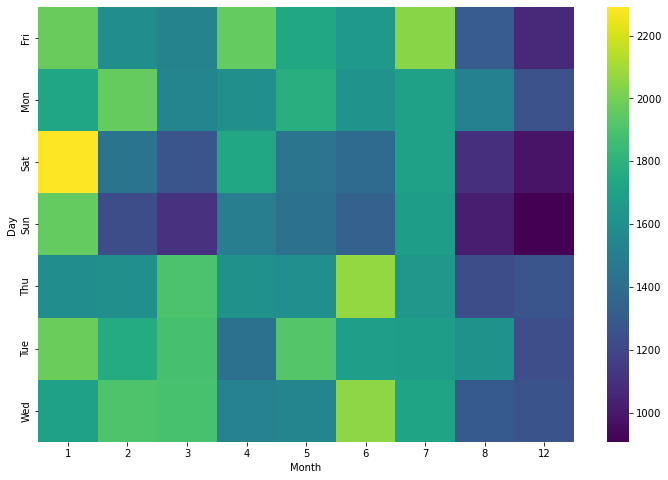

In [106]:
plt.figure(figsize=(12,8))

sns.heatmap(dayMonth, cmap='viridis')

<Figure size 864x576 with 0 Axes>

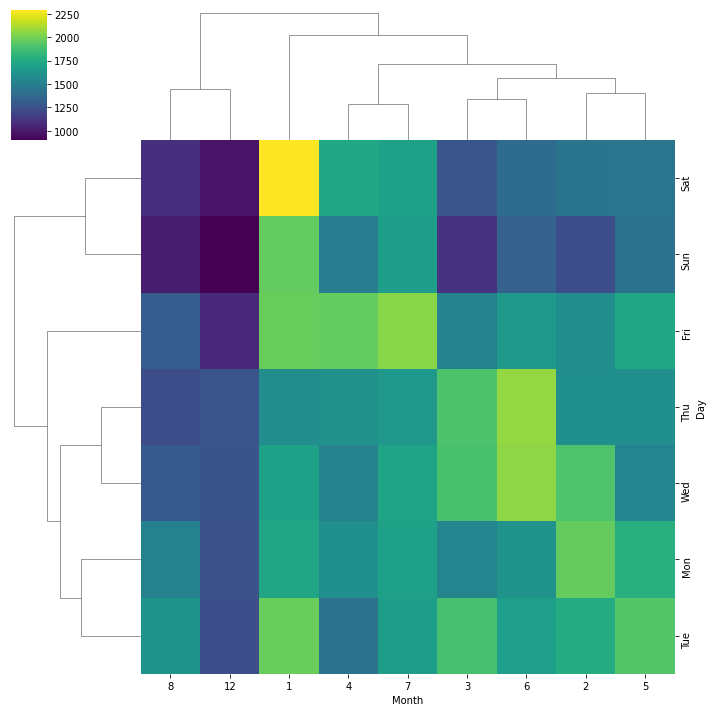

In [107]:
plt.figure(figsize=(12,8))

sns.clustermap(dayMonth, cmap='viridis')

## Wnioski
Z początkiem roku ilość zdarzeń jest największa po czym z upływem czasu spada. Jeżeli chodzi o dni to najmniej w niedzielę nieco więcej w sobotę. Najwięcej w ciągu tygodnia. Najwięcej zdarzeń ma charakter medyczny, potem komunikacyjne, na końcu są pożary. 